# Задание 1

In [160]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [161]:
X, _ = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)
np.random.seed(13)
X_stretched = np.dot(X, np.random.randn(2, 2))

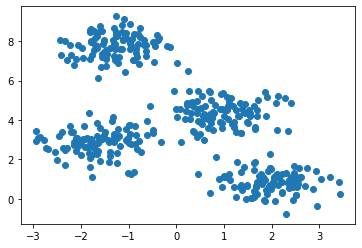

In [162]:
plt.scatter(X[:,0], X[:,1])

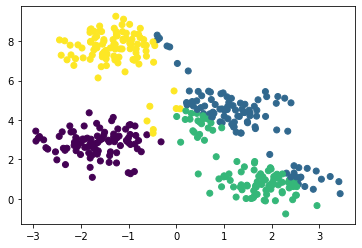

In [163]:
gm1 = GaussianMixture(n_components=4, covariance_type = 'spherical').fit(X_stretched)

labels = gm1.predict(X_stretched)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')

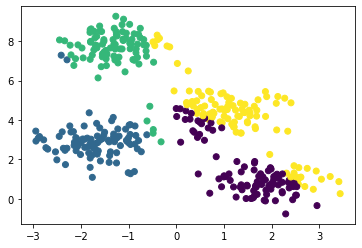

In [168]:
gm2 = GaussianMixture(n_components=4, covariance_type = 'diag').fit(X_stretched)

labels = gm2.predict(X_stretched)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')

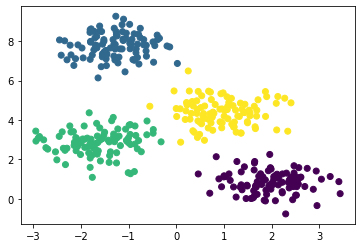

In [170]:
gm3 = GaussianMixture(n_components=4, covariance_type = 'full').fit(X_stretched)

labels = gm3.predict(X_stretched)
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')

# Задание 2

In [171]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

digits = load_digits()

pca = PCA(0.95)
data = pca.fit_transform(digits.data)

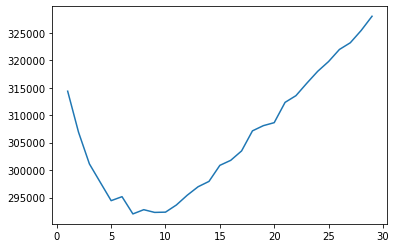

In [173]:
n_components = np.arange(1, 30)
models = [GaussianMixture(n, covariance_type='full').fit(data) for n in n_components]
plt.plot(n_components, [m.bic(data) for m in models], label='BIC')

In [174]:
arr = [m.bic(data) for m in models]
best_comp = arr.index(min(arr))

In [175]:
best_comp

6

In [176]:
gmm = GaussianMixture(n_components=best_comp, covariance_type = 'full').fit(data)

In [177]:
sample = gmm.sample(100)

In [179]:
final_data = pca.inverse_transform(sample[0])

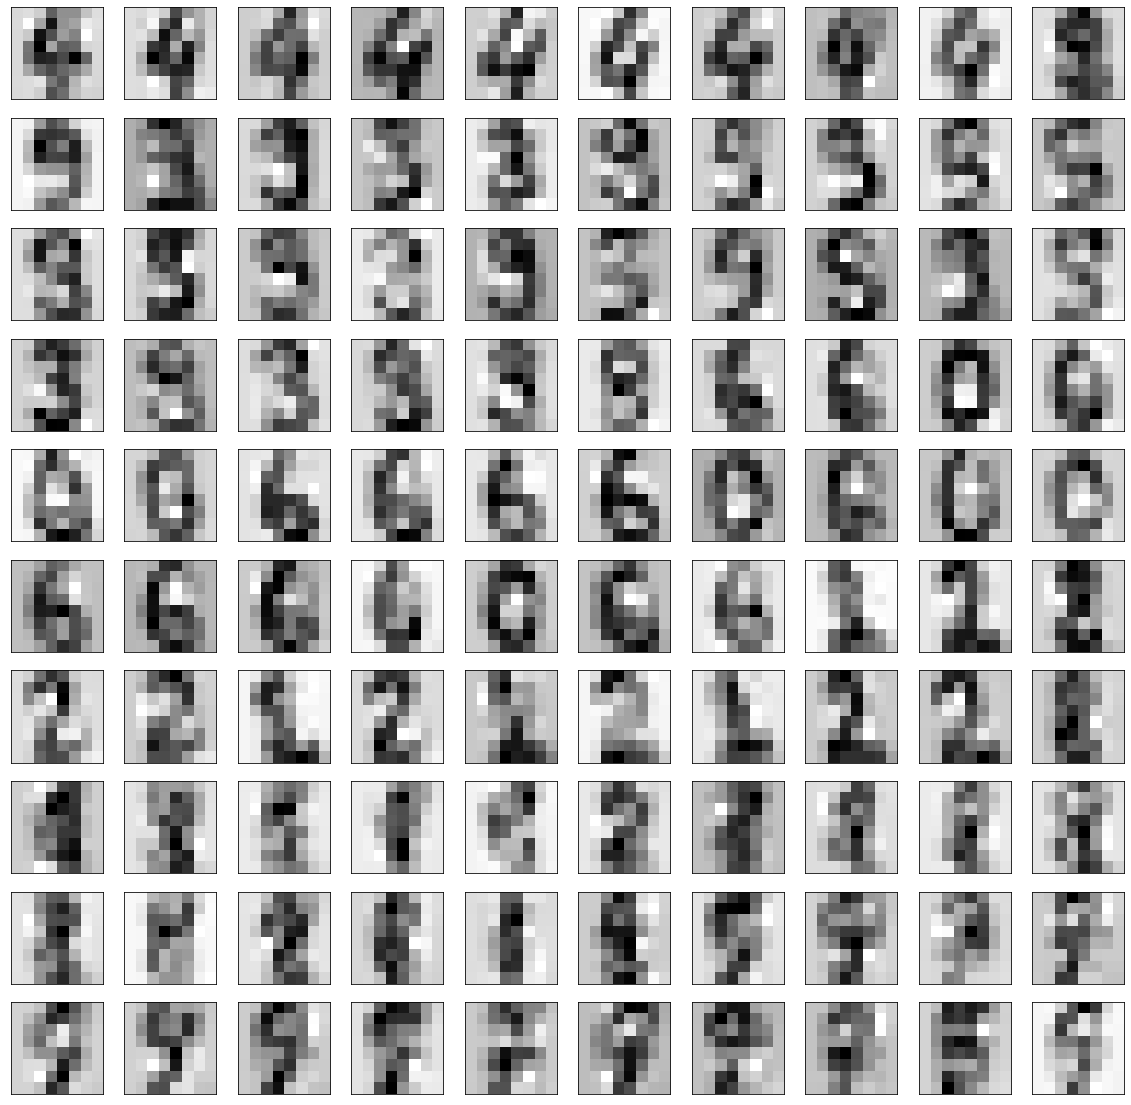

In [183]:
fig, ax = plt.subplots(10, 10, figsize = (20, 20))
for i, axi in enumerate(ax.flat):
    axi.imshow(final_data[i].reshape(8, 8), cmap='binary')
    axi.set(xticks=[], yticks=[])